# Pandas

https://pandas.pydata.org/docs/user_guide/index.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
# !pip install pandas==1.2.4

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'2.0.1'

## 1. Series

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [5]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
data[1]

0.5

In [8]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [9]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [10]:
data['b']

0.5

In [11]:
data[1]

0.5

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [3]:
population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135
}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [14]:
population['California']

38332521

In [15]:
population[0]

38332521

In [16]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [17]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [18]:
data_dict = {
    2:'a', 
    1:'b', 
    3:'c'
}
pd.Series(data_dict)

2    a
1    b
3    c
dtype: object

In [19]:
serie = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
serie

3    c
2    a
dtype: object

In [20]:
serie.index

Int64Index([3, 2], dtype='int64')

## 2. DataFrames

In [21]:
population  # serie

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [4]:
area_dict = {'California': 423967, 
             'Texas': 695662, 
             'New York': 141297,
             'Florida': 170312, 
             'Illinois': 149995
            }
area = pd.Series(area_dict)  # serie
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [5]:
states = pd.DataFrame({'population': population, 'area': area})  # dataframe
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [24]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [25]:
states.columns

Index(['population', 'area'], dtype='object')

In [26]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [27]:
type(states['area'])

pandas.core.series.Series

In [10]:
# Si no se especifica nombre de columna entonces saldrá 0
# pd.DataFrame(population)

# Especificar nombre columna
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [12]:
pd.DataFrame([
    {'a': 1, 'b': 2}, 
    {'b': 3, 'c': 4}
])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [30]:
serie1 = {
    'a': 1, 
    'b': 2
}
serie2 = {
    'b': 3, 
    'c': 4
}
pd.DataFrame([serie1, serie2])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [14]:
# pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'])
pd.DataFrame(np.random.rand(3, 2), index=['a', 'b', 'c'], columns=['foo', 'bar'])

,foo,bar
a,0.670706,0.803264
b,0.376472,0.802945
c,0.042623,0.788360


## 3. Índices

Tanto Series como DataFrames tienen un objeto Index.

In [32]:
idx = pd.Index([2, 3, 5, 7, 11])
idx

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [33]:
print(idx[0])
print(idx[1])

2
3


In [34]:
# Atributos de un índice
print(idx.size, idx.shape, idx.ndim, idx.dtype)

5 (5,) 1 int64


In [35]:
# La principal diferencia entre los índices de pandas y los arrays de numpy es que 
# los índices no pueden modificarse:

# idx[0] = 99  # Devuelve TypeError: Index does not support mutable operations

In [36]:
idx = pd.Index(['a', 'b', 'c'])
df = pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=idx)
df

,foo,bar
a,0.441783,0.311117
b,0.808836,0.840255
c,0.357648,0.602711


In [37]:
df.index

Index(['a', 'b', 'c'], dtype='object')

In [38]:
# Un Index actúa como un conjunto (set) de python
idx_a = pd.Index([1, 3, 5, 7, 9])
idx_b = pd.Index([2, 3, 5, 7, 11])

In [39]:
idx_a & idx_b  # intersección

<ipython-input-39-a047c59eacb9>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  idx_a & idx_b  # intersección


Int64Index([3, 5, 7], dtype='int64')

In [40]:
idx_a | idx_b  # union

<ipython-input-40-a1677c7e7ac4>:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_a | idx_b  # union


Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

## 4. Seleccionar elementos

### Series

In [15]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [42]:
type(data)

pandas.core.series.Series

In [43]:
data['b']

0.5

In [44]:
'a' in data

True

In [45]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [46]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [47]:
data['e'] = 1.25  # Añadir un elemento
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [48]:
data['e'] = 2.25  # Modificar un elemento
data

a    0.25
b    0.50
c    0.75
d    1.00
e    2.25
dtype: float64

In [16]:
# slicing por índice explícito
data['a':'c'] # ambos inclusive

a    0.25
b    0.50
c    0.75
dtype: float64

In [19]:
# slicing por índice implítico
# data[0:2] # el último está excluido
data[0:3]

a    0.25
b    0.50
c    0.75
dtype: float64

In [21]:
# masking
data[data >= 0.75]

c    0.75
d    1.00
dtype: float64

In [24]:
mask = (data >= 0.75)
data[mask]

c    0.75
d    1.00
dtype: float64

In [53]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [54]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    2.25
dtype: float64

In [55]:
# fancy indexing
data[['e', 'a']]

e    2.25
a    0.25
dtype: float64

### loc

In [56]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [57]:
# loc utiliza el índice explícito, es decir, el que se ha asignado en el parámetro index
data.loc[1]

'a'

In [58]:
data.loc[1:3]

1    a
3    b
dtype: object

### iloc

In [30]:
# iloc utiliza el índice implítico, es decir, el número de elementos que haya empezando en 0
data.iloc[0]

0.25

In [60]:
data.iloc[1:3]

3    b
5    c
dtype: object

### Dataframe

In [31]:
area = pd.Series({
    'California': 423967, 
    'Texas': 695662,
    'New York': 141297, 
    'Florida': 170312,
    'Illinois': 149995})
pop = pd.Series({
    'California': 38332521, 
    'Texas': 26448193,
    'New York': 19651127, 
    'Florida': 19552860,
    'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [62]:
data['area']  # Utilizar esta forma en vez de data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [63]:
data['pop']['Texas']

26448193

In [64]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [65]:
data.area is data['area']

True

In [66]:
data.pop is data['pop']

False

In [67]:
data['pop'] / data['area']

California     90.413926
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
dtype: float64

In [68]:
type(data['pop'] / data['area'])

pandas.core.series.Series

In [69]:
# Crear una nueva columna con el resultado de un cálculo sobre otras columnas
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [70]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [71]:
type(data.values)

numpy.ndarray

In [72]:
data['area'].values

array([423967, 695662, 141297, 170312, 149995])

In [73]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [74]:
data.values[0,0]

423967.0

In [75]:
# Iterar sobre las filas de un dataframe

for index, row in data.iterrows():
    # print(index, row[0], row[1])
    print(index, row['area'], row['pop'])
    

California 423967.0 38332521.0
Texas 695662.0 26448193.0
New York 141297.0 19651127.0
Florida 170312.0 19552860.0
Illinois 149995.0 12882135.0


## 5. Cargar datos

* Cargar datos desde CSV
* Cargar datos desde excel
* Cargar datos desde ods
* Cargar datos desde JSON
* Cargar datos desde txt
* Cargar datasets de prueba desde seaborn

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

### 1. Cargar datos desde CSV

In [34]:
df = pd.read_csv("../../data/tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,NaN,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [77]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,NaN
1,10.34,NaN,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,NaN
5,25.29,4.71,Male,No,Sun,Dinner,4.0
6,8.77,2.00,Male,No,Sun,Dinner,2.0
7,26.88,3.12,Male,No,Sun,Dinner,4.0
8,15.04,1.96,Male,No,Sun,Dinner,NaN
9,14.78,3.23,Male,No,Sun,Dinner,2.0


In [78]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [79]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         243 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        238 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [81]:
df.describe()

,total_bill,tip,size
count,244.000000,243.000000,238.000000
mean,19.785943,3.003786,4.289916
std,8.902412,1.383812,25.800189
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.920000,2.000000
75%,24.127500,3.575000,3.000000
max,50.810000,10.000000,400.000000


In [82]:
df = pd.read_csv ("../data/tips.csv", dtype={'size': 'Int8'})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,<NA>
1,10.34,NaN,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,<NA>


In [83]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size             Int8
dtype: object

In [35]:
df = pd.read_csv("../../data/TSLA.csv", sep=',', encoding="utf-8", skipinitialspace=True,
                 index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [36]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-04-27', '2023-04-28', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-08',
               '2023-05-09', '2023-05-10'],
              dtype='datetime64[ns]', name='Date', length=3239, freq=None)

<Axes: xlabel='Date'>

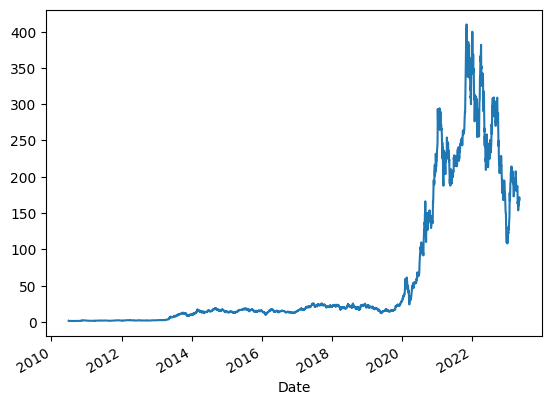

In [40]:
df["Close"].plot() 

[Text(0, 0.5, 'CLOSE PRICE')]

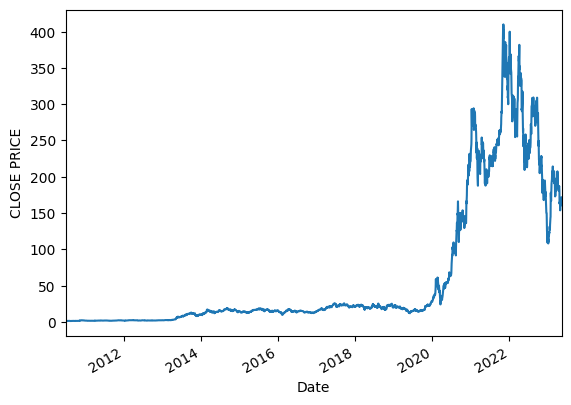

In [41]:
ax = df["Close"].plot() 
ax.autoscale(axis="x", tight=True)
ax.set(ylabel="CLOSE PRICE")

### Cargar datos desde excel

In [87]:
# !pip install openpyxl
# pd.read_excel('path/to/file.xlsx', engine='openpyxl')

dfexcel = pd.read_excel("../data/customers.xlsx")
dfexcel.head()

,Customer ID,Customer,Address,City,Zip,Country
0,1001,Adder Inc.,14 George Washington Avenue,San Francisco,NaN,U.S.A.
1,1002,Adder Inc.,"9, rue de la Poste",Montreal,NaN,Canada
2,1003,Al Akbar News Services,NaN,Kabul,NaN,Afghanistan
3,1004,Alf Jequitaine,Rue de Gaulle 13,Paris,75664,France
4,1005,Asian Pizza,NaN,Thimpu,NaN,Bhutan


In [89]:
# !pip install odfpy
# dfexcel = pd.read_excel("../data/tips.ods", nrows=2)
# dfexcel

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,NaN
1,10.34,NaN,Male,No,Sun,Dinner,3.0


### Cargar datos desde URL

In [42]:
url_tsla = "https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1277769600&period2=1683763200&interval=1d&events=history&includeAdjustedClose=true"
url_amc = "https://query1.finance.yahoo.com/v7/finance/download/AMC?period1=1387324800&period2=1622419200&interval=1d&events=history&includeAdjustedClose=true"

In [47]:
df = pd.read_csv(url_tsla, delimiter=',', encoding="utf-8", skipinitialspace=True,
                 index_col='Date', parse_dates=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500
2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900
2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112249400
2023-05-09,168.949997,169.820007,166.559998,169.149994,169.149994,88965000
2023-05-10,172.550003,174.429993,166.679993,168.539993,168.539993,119650600


In [49]:
np.set_printoptions(suppress=True)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3.239000e+03
mean,62.013034,63.409428,60.481358,61.977438,61.977438,9.541484e+07
std,96.288674,98.504081,93.799626,96.177731,96.177731,8.157362e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.538334,9.720000,9.305000,9.559667,9.559667,4.368075e+07
50%,16.507334,16.733334,16.306000,16.514000,16.514000,7.757250e+07
75%,37.970667,38.626999,36.995334,37.723999,37.723999,1.212009e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<Axes: xlabel='Date'>

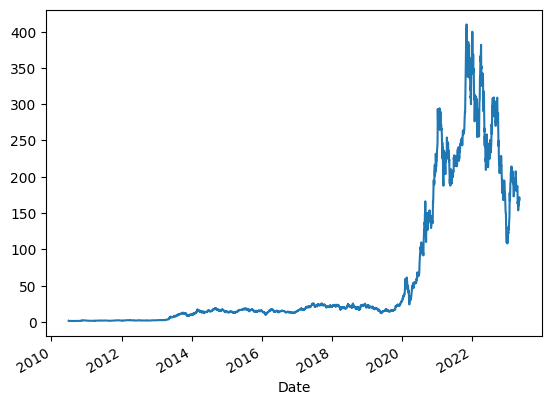

In [50]:
df["Close"].plot(legend=False)

In [95]:
df = pd.read_csv("https://download.bls.gov/pub/time.series/cu/cu.item", sep="\t")
df.head()

,item_code,item_name,display_level,selectable,sort_sequence
0,AA0,All items - old base,0,T,2
1,AA0R,Purchasing power of the consumer dollar - old ...,0,T,399
2,SA0,All items,0,T,1
3,SA0E,Energy,1,T,374
4,SA0L1,All items less food,1,T,358


### Procesar un dataset grande

https://pandas.pydata.org/docs/user_guide/scale.html

chunksize

In [96]:
for chunk in pd.read_csv(url_amc, chunksize=100):
    print(type(chunk))  # Se generan dataframes que poder operar por separado y almacenar en archivos o db
    print(len(chunk.index))  # cada dataframe tiene 100 filas o las indicadas en chunksize

<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
100
<class 'pandas.core.frame.DataFrame'>
74


Alternativa

https://dask.org/

https://spark.apache.org/

### Cargar datasets de Seaborn

In [97]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [98]:
# todos los datasets disponibles en seaborn:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [99]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


### Cargar datos en json

In [100]:
df = pd.read_json('data/instruments.json', lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


## Filtrado de datos

In [51]:
# df = sns.load_dataset('tips')
df = pd.read_csv('../../data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,NaN,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [103]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [53]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [105]:
print(len(df.index)) # Contar número de elementos

244


In [106]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [62]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [58]:
# obtener todos los posibles días que hay en la columna 'time'
df['time'].unique()
# df['time'].nunique()

array(['Dinner', 'Lunch'], dtype=object)

In [108]:
# obtener todos los posibles días que hay en la columna 'day'
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [61]:
df['day'].nunique()

4

In [60]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [109]:
mask = (df['day'] == 'Thur')
df_thur = df[mask]
df_thur

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
205,16.47,3.23,Female,Yes,Thur,Lunch,3


In [71]:
df_filtered = df[(df['day'] == 'Thur') | (df['day'] == 'Fri')]
df_filtered

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
223,15.98,3.00,Female,No,Fri,Lunch,3
224,13.42,1.58,Male,Yes,Fri,Lunch,2
225,16.27,2.50,Female,Yes,Fri,Lunch,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2


In [111]:
df_filtered['day'].unique()

['Thur', 'Fri']
Categories (2, object): ['Thur', 'Fri']

In [112]:
print(len(df_filtered.index)) # Contar número de elementos

81


In [113]:
df_filtered.index

Int64Index([ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
             90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 117,
            118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
            144, 145, 146, 147, 148, 149, 191, 192, 193, 194, 195, 196, 197,
            198, 199, 200, 201, 202, 203, 204, 205, 220, 221, 222, 223, 224,
            225, 226, 243],
           dtype='int64')

In [72]:
# resetear el índice en el dataframe filtrado:
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,total_bill,tip,sex,smoker,day,time,size
0,27.20,4.00,Male,No,Thur,Lunch,4
1,22.76,3.00,Male,No,Thur,Lunch,2
2,17.29,2.71,Male,No,Thur,Lunch,2
3,19.44,3.00,Male,Yes,Thur,Lunch,2
4,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
76,15.98,3.00,Female,No,Fri,Lunch,3
77,13.42,1.58,Male,Yes,Fri,Lunch,2
78,16.27,2.50,Female,Yes,Fri,Lunch,2
79,10.09,2.00,Female,Yes,Fri,Lunch,2


In [115]:
df_filtered.index

RangeIndex(start=0, stop=81, step=1)

In [116]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [117]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [118]:
df['name'].unique()[:20]  # Mostrar los primeros 20 nombres únicos

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan'], dtype=object)

In [119]:
df['name'].str.contains('ford')

0      False
1      False
2      False
3      False
4       True
       ...  
393     True
394    False
395    False
396     True
397    False
Name: name, Length: 398, dtype: bool

In [120]:
# Filtrar todos los que contengan la palabra ford:
df.loc[df['name'].str.contains('ford')].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
17,21.0,6,200.0,85.0,2587,16.0,70,usa,ford maverick
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto


In [121]:
# Filtrar todos los que NO contengan la palabra ford:
df.loc[~df['name'].str.contains('ford')].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala


In [122]:
df.loc[df['name'].str.contains('ford|chevrolet')].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo


In [123]:
import re
df.loc[df['name'].str.contains('FoRd|cheVrOlet', flags=re.I)].head()  # Filtra case insensitive

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo


In [124]:

df.loc[df['name'].str.contains('chev*')].head()  # Todo lo que empieza por chev

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
12,15.0,8,400.0,150.0,3761,9.5,70,usa,chevrolet monte carlo
26,10.0,8,307.0,200.0,4376,15.0,70,usa,chevy c20
30,28.0,4,140.0,90.0,2264,15.5,71,usa,chevrolet vega 2300


## Trabajar con valores Nulos

### NaN en numpy

NaN: Not a Number

In [125]:
arr = np.array([1, 2, 3, 4])
arr.dtype

dtype('int64')

In [126]:
arr = np.array([1, np.nan, 3, 4])  # cuando hay nan el array es considerado de tipo float
arr.dtype

dtype('float64')

In [127]:
# Cuando se hacen operaciones aritméticas sobre nan todo se convierte en nan:
print(1 + np.nan)
print(0 * np.nan)
print(arr.sum())
print(arr.min())
print(arr.max())

nan
nan
nan
nan
nan


In [128]:
# Operaciones aritméticas especiales para evitar nan con numpy:
print(np.nansum(arr))
print(np.nanmin(arr))
print(np.nanmax(arr))

8.0
1.0
4.0


### Nan en pandas

In [129]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [130]:
x = pd.Series(range(5), dtype=int)
x

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [131]:
x[0] = None
x

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

### Operaciones con nulos

- isnull(): genera una máscara booleana indicando los valores faltantes
- notnull(): lo contrario a isnull()
- dropna(): borra las filas con nulos
- fillna(): rellena los valores nulos con el valor indicado por parámetro

https://pandas.pydata.org/docs/user_guide/missing_data.html

### Detectar valores nulos en series

In [132]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [133]:
print(data.iloc[0])
print(data.loc[0])

1
1


In [134]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [135]:
data[data.isnull()] # devuelve solo aquellos elementos que sí son nulos en la serie

1     NaN
3    None
dtype: object

In [136]:
data[data.notnull()] # devuelve solo aquellos elementos que no son nulos en la serie

0        1
2    hello
dtype: object

### Detectar valores nulos en dataframes

In [203]:
df = pd.DataFrame([[1,np.nan, 2],
                    [2, 3, 5],
                   [np.nan, np.nan, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,NaN,6


In [138]:
df.isnull()

,0,1,2
0,False,True,False
1,False,False,False
2,True,True,False


In [205]:
df.isnull().sum()

0    1
1    2
2    0
dtype: int64

In [139]:
df.isna()

,0,1,2
0,False,True,False
1,False,False,False
2,True,True,False


In [140]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,NaN,6


In [141]:
df.isnull().sum()  # suma por columna

0    1
1    2
2    0
dtype: int64

In [142]:
df.isnull().sum(axis=1)  # suma por fila

0    1
1    0
2    2
dtype: int64

### Borrar valores nulos

In [143]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,NaN,6


In [144]:
df.dropna()  # devuelve un nuevo dataframe sin aquellas filas con nulos

,0,1,2
1,2.0,3.0,5


In [145]:
df.dropna(axis='columns')  # devuelve un nuevo dataframe sin aquellas columnas con nulos

,2
0,2
1,5
2,6


In [146]:
# En caso de tener un dataframe con todas las filas con un nulo devuelve vacío:
df = pd.DataFrame([[1,np.nan, 2],
                    [2, np.nan, 5],
                   [np.nan, np.nan, np.nan]])
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,NaN,5.0
2,NaN,NaN,NaN


In [147]:
df.dropna()

,0,1,2


In [148]:
# el parámetro how con valor all permite especificar que solo se borren si todos los valores son nulos
df.dropna(how='all')

,0,1,2
0,1.0,NaN,2.0
1,2.0,NaN,5.0


In [149]:
df.dropna(axis='columns', how='all')

,0,2
0,1.0,2.0
1,2.0,5.0
2,NaN,NaN


In [150]:
df = pd.DataFrame([[1,np.nan, 2],
                    [2, 2, 5],
                   [np.nan, np.nan, 1]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,2.0,5
2,NaN,NaN,1


In [151]:
# thresh permite indicar el mínimo de elementos no nulos que debe haber para que no se borre
df.dropna(axis='rows', thresh=1)

,0,1,2
0,1.0,NaN,2
1,2.0,2.0,5
2,NaN,NaN,1


In [152]:
df.dropna(axis='rows', thresh=2)  # permanecen aquellas que tienen al menos dos valores no nulos

,0,1,2
0,1.0,NaN,2
1,2.0,2.0,5


In [153]:
df.dropna(axis='rows', thresh=3)  # permanecen aquellas que tienen al menos tres valores no nulos

,0,1,2
1,2.0,2.0,5


### Rellenar nulos

In [154]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [155]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [156]:
# forward-fill: Rellenar cada nulo con el valor anterior
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [157]:
# back-fill: Rellenar cada nulo con el valor que está después
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [158]:
df = pd.DataFrame([[1,np.nan, 2],
                    [2, 2, 5],
                   [np.nan, np.nan, 1]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,2.0,5
2,NaN,NaN,1


In [159]:
df.fillna(0)

,0,1,2
0,1.0,0.0,2
1,2.0,2.0,5
2,0.0,0.0,1


In [160]:
df.fillna(method='ffill')

,0,1,2
0,1.0,NaN,2
1,2.0,2.0,5
2,2.0,2.0,1


In [161]:
df.fillna(method='ffill', axis=1) # aplica sobre columnas

,0,1,2
0,1.0,1.0,2.0
1,2.0,2.0,5.0
2,NaN,NaN,1.0


In [162]:
df.fillna(method='bfill')

,0,1,2
0,1.0,2.0,2
1,2.0,2.0,5
2,NaN,NaN,1


In [163]:
# Cuando se ejecuta dropna() o fillna() se genera un nuevo dataframe
# si se quiere aplicar los cambios sobre el dataframe actual se utiliza el argumento inplace:
df.fillna(0, inplace=True)
df

,0,1,2
0,1.0,0.0,2
1,2.0,2.0,5
2,0.0,0.0,1


### Explorar nulos de un CSV

In [164]:
df = pd.read_csv ("../data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,NaN
1,10.34,NaN,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,NaN


In [165]:
df.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [166]:
df.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [167]:
df.isnull().sum()  # suma por columna

total_bill    0
tip           1
sex           0
smoker        0
day           0
time          0
size          6
dtype: int64

In [168]:
df.isna().sum()

total_bill    0
tip           1
sex           0
smoker        0
day           0
time          0
size          6
dtype: int64

In [169]:
# Al borrar los nulos se pasa de 244 filas a 237
df.dropna()

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0
6,8.77,2.00,Male,No,Sun,Dinner,2.0
7,26.88,3.12,Male,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [170]:
df['tip'].mean()

3.003786008230453

In [171]:
# Rellenar los nulos de la columna tip con la media
df['tip'] = df['tip'].fillna(df["tip"].mean())
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,NaN
1,10.34,3.003786,Male,No,Sun,Dinner,3.0
2,21.01,3.500000,Male,No,Sun,Dinner,3.0
3,23.68,3.310000,Male,No,Sun,Dinner,2.0
4,24.59,3.610000,Female,No,Sun,Dinner,NaN
...,...,...,...,...,...,...,...
239,29.03,5.920000,Male,No,Sat,Dinner,3.0
240,27.18,2.000000,Female,Yes,Sat,Dinner,2.0
241,22.67,2.000000,Male,Yes,Sat,Dinner,2.0
242,17.82,1.750000,Male,No,Sat,Dinner,2.0


In [172]:
df['size'] = df['size'].fillna(0) # Rellenar sobre una serie con 0
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,0.0
1,10.34,3.003786,Male,No,Sun,Dinner,3.0
2,21.01,3.500000,Male,No,Sun,Dinner,3.0
3,23.68,3.310000,Male,No,Sun,Dinner,2.0
4,24.59,3.610000,Female,No,Sun,Dinner,0.0


In [173]:
# rellenar a la vez con valores diferentes en base a la columna
df = pd.read_csv ("../data/tips.csv")
df_fillna = df.fillna({
    "size": -1,
    "tip": 0
})
df_fillna.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,-1.0
1,10.34,0.00,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,-1.0


In [174]:
df = pd.read_csv ("../data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,NaN
1,10.34,NaN,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,NaN


In [175]:
# Rellenar la columna size con la media
df['size'].fillna(df['size'].mean(), inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.710084
1,10.34,NaN,Male,No,Sun,Dinner,3.000000
2,21.01,3.50,Male,No,Sun,Dinner,3.000000
3,23.68,3.31,Male,No,Sun,Dinner,2.000000
4,24.59,3.61,Female,No,Sun,Dinner,2.710084


In [176]:
# Redondear la columna size ya que representa número de personas y lo convierte de float a int:
df['size'] = df['size'].round(decimals=0).astype('int')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,3
1,10.34,NaN,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,3


### Reemplazar valores

In [3]:
df = pd.read_csv ("../../data/tips.csv")
df.iloc[230]

total_bill     24.01
tip              2.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               4
Name: 230, dtype: object

In [178]:

df.fillna(-1, inplace=True)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,-1.0
1,10.34,-1.00,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,-1.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [179]:
df.replace(-1, 0)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,0.0
1,10.34,0.00,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,0.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


<AxesSubplot:>

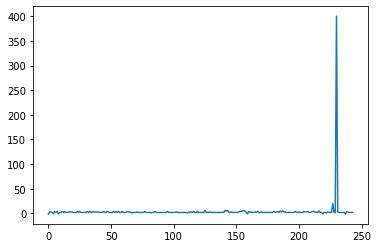

In [180]:
df['size'].plot()

In [181]:
# Reemplazar el outlier de 400 personas por 4 personas
df.replace(400,4, inplace=True)

In [182]:
df.iloc[230]

total_bill     24.01
tip              2.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size             4.0
Name: 230, dtype: object

mantenemos 20 personas en una cena porque puede ser posible. Ejemplo: cena de navidad

<AxesSubplot:>

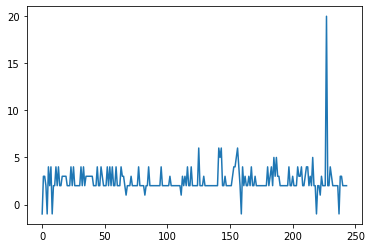

In [183]:
df['size'].plot()

In [4]:
# Otra opción: utilizando filtros (máscara booleana)
# 30 representaría el número de comensales máximo en una mesa en un restaurante
mask = df['size'] <= 30
median = df[mask]['size'].median()

mask = df['size'] > 30
df.loc[mask, 'size'] = median

En caso de necesitar reemplazar strings revisar:

https://pandas.pydata.org/docs/user_guide/missing_data.html#string-regular-expression-replacement

## Indexación jerárquica

Multi-indexing permite trabajar con más de dos dimensiones al permitir crear un índice de múltiples niveles.

In [184]:
# Utilizando listas
df = pd.DataFrame(np.random.rand(4, 2), 
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.690733  0.384555
  2  0.443935  0.827828
b 1  0.434474  0.072128
  2  0.116131  0.369234

In [185]:
# utilizando tuplas:
data = {
    ('California', 2000): 33871648,
    ('California', 2010): 37253956,
    ('Texas', 2000): 20851820,
    ('Texas', 2010): 25145561,
    ('New York', 2000): 18976457,
    ('New York', 2010): 19378102
}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [186]:
# Creando el multiindex por separado:
idx = pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])
print(idx)

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )


In [187]:
df = pd.DataFrame(np.random.rand(4, 2), 
                  index=idx,
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.092792  0.558905
  2  0.899882  0.709275
b 1  0.731087  0.570982
  2  0.644297  0.997363

In [188]:
idx = pd.MultiIndex.from_tuples([('speed', 'kmh'),
                                       ('speed', 'mph')])
df = pd.DataFrame([[7, 9], [18, 25]],
                                     index=['Aston Martin', 'Bentley'],
                                     columns=idx)  # También se puede añadir sobre las columnas:
df

speed    
               kmh mph
Aston Martin     7   9
Bentley         18  25

In [189]:
# La función stack permite trasladar de columnas a índice:
df = df.stack()
df

speed
Aston Martin kmh      7
             mph      9
Bentley      kmh     18
             mph     25

In [190]:
# a su vez, la función unstack permite hacer lo contrario:
df.unstack()

speed    
               kmh mph
Aston Martin     7   9
Bentley         18  25

## Operaciones sobre datasets:


In [191]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [192]:
df['total_bill'] * 1.10

0      18.689
1      11.374
2      23.111
3      26.048
4      27.049
        ...  
239    31.933
240    29.898
241    24.937
242    19.602
243    20.658
Name: total_bill, Length: 244, dtype: float64

In [193]:
type(df['total_bill'] * 1.10)

pandas.core.series.Series

In [194]:
df['total_bill_iva'] = df['total_bill'] * 1.10  # IVA reducido del 10%, si fuera 21% poner 1.21
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_iva
0,16.99,1.01,Female,No,Sun,Dinner,2,18.689
1,10.34,1.66,Male,No,Sun,Dinner,3,11.374
2,21.01,3.50,Male,No,Sun,Dinner,3,23.111
3,23.68,3.31,Male,No,Sun,Dinner,2,26.048
4,24.59,3.61,Female,No,Sun,Dinner,4,27.049


In [195]:
# reordenar columnas

df = df[['total_bill', 'total_bill_iva', 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
df.head()

,total_bill,total_bill_iva,tip,sex,smoker,day,time,size
0,16.99,18.689,1.01,Female,No,Sun,Dinner,2
1,10.34,11.374,1.66,Male,No,Sun,Dinner,3
2,21.01,23.111,3.50,Male,No,Sun,Dinner,3
3,23.68,26.048,3.31,Male,No,Sun,Dinner,2
4,24.59,27.049,3.61,Female,No,Sun,Dinner,4


In [196]:
# mover una sola columna a una posición
total_bill_iva = df.pop('total_bill_iva')  # extrae la columna

df.insert(0, 'total_bill_iva', total_bill_iva)  # la añade en el índice 0

df.head()

,total_bill_iva,total_bill,tip,sex,smoker,day,time,size
0,18.689,16.99,1.01,Female,No,Sun,Dinner,2
1,11.374,10.34,1.66,Male,No,Sun,Dinner,3
2,23.111,21.01,3.50,Male,No,Sun,Dinner,3
3,26.048,23.68,3.31,Male,No,Sun,Dinner,2
4,27.049,24.59,3.61,Female,No,Sun,Dinner,4


In [197]:
df.columns

Index(['total_bill_iva', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time',
       'size'],
      dtype='object')

In [198]:
# insertar sin conocer la posición, a partir del nombre de otra columna
total_bill_iva = df.pop('total_bill_iva')  # extrae la columna

position = df.columns.get_loc('day') + 1 # Obtiene la posición deseada (después de la columna day)

df.insert(position, 'total_bill_iva', total_bill_iva)  # la añade

df.head()

,total_bill,tip,sex,smoker,day,total_bill_iva,time,size
0,16.99,1.01,Female,No,Sun,18.689,Dinner,2
1,10.34,1.66,Male,No,Sun,11.374,Dinner,3
2,21.01,3.50,Male,No,Sun,23.111,Dinner,3
3,23.68,3.31,Male,No,Sun,26.048,Dinner,2
4,24.59,3.61,Female,No,Sun,27.049,Dinner,4


In [199]:
cols = list(df.columns.values)
cols

['total_bill', 'tip', 'sex', 'smoker', 'day', 'total_bill_iva', 'time', 'size']

In [200]:
# mantiene solo las 3 primeras columnas:
df = df[cols[:3]]
df

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
...,...,...,...
239,29.03,5.92,Male
240,27.18,2.00,Female
241,22.67,2.00,Male
242,17.82,1.75,Male


In [201]:
# Borrar una columna:

df = df.drop(columns=['total_bill_iva'])
df.head()

KeyError: "['total_bill_iva'] not found in axis"

## Combinar datasets:

- concat()
- append()
- merge()
- join()

https://pandas.pydata.org/docs/user_guide/merging.html


### concat()

In [ ]:
# concatenar arrays en numpy:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

In [207]:
# concatenar series en pandas:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
ser3 = pd.concat([ser1, ser2])
ser3

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
# concatenar dataframes en pandas:

df1 = pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}], index=[1, 2])
df2 = pd.DataFrame([{'a': 5, 'b': 6}, {'a': 7, 'b': 8}], index=[3, 4])

print(df1); print('\n'); print(df2); print('\n'); print(pd.concat([df1, df2]))

In [ ]:
# concatenar dataframes en pandas:

df1 = pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}], index=[1, 2])
df2 = pd.DataFrame([{'a': 5, 'b': 6}, {'a': 7, 'b': 8}], index=[1, 2])

# Por defecto concatena sobre filas, en caso de tener índices iguales los duplica, en este caso [1,2]
print(df1); print('\n'); print(df2); print('\n'); print(pd.concat([df1, df2])) 

In [ ]:
# concatenar dataframes en pandas:

df1 = pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}], index=[1, 2])
df2 = pd.DataFrame([{'a': 5, 'b': 6}, {'a': 7, 'b': 8}], index=[1, 2])

# Por defecto concatena sobre filas, en caso de tener índices iguales los duplica, se evita con ignore_index
print(df1); print('\n'); print(df2); print('\n'); print(pd.concat([df1, df2], ignore_index=True)) 

In [ ]:
# concatenar dataframes en pandas:

df1 = pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}], index=[1, 2])
df2 = pd.DataFrame([{'c': 5, 'd': 6}, {'c': 7, 'd': 8}], index=[1, 2])

print(df1); print('\n'); print(df2); print('\n'); print(pd.concat([df1, df2], axis=1)) # Concatenar sobre columnas

In [ ]:
# por defecto la función concat rellena con valores NA cuando no hay datos disponibles:

df1 = pd.DataFrame([{'a': 1, 'b': 2}, {'a': 3, 'b': 4}], index=[1, 2])
df2 = pd.DataFrame([{'b': 5, 'c': 6}, {'b': 7, 'c': 8}], index=[1, 2])
print(df1); print('\n'); print(df2); print('\n'); print(pd.concat([df1, df2]))

In [ ]:
# inner equivale a la intersección
# outer por defecto equivale a la unión (por defecto es outer)
print(pd.concat([df1, df2], join='inner')) 

### append()

In [ ]:
print(df1); print(df2); print(df1.append(df2))  # mismo resultado que pd.concat([df1, df2])

In [ ]:
# tanto concat() como append() generan nuevas copias de los datos, esto puede ocasionar problemas de rendimiento
# en datasets muy grandes

### merge()

La función merge() permite implementar varios tipos de join:

- one-to-one
- many-to-one
- many-to-many

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

print(df1); print('\n'); print(df2)

In [ ]:
# one to one join
df3 = pd.merge(df1, df2)
df3

In [ ]:
# many to one join
# en este caso hay múltiples empleados para un mismo grupo y supervisor
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 
                    'supervisor': ['Carly', 'Guido', 'Steve']})

print(df3); print('\n'); print(df4); print('\n'); print(pd.merge(df3, df4))

In [ ]:
# many to many
# múltiples empleados en un mismo grupo y múltiples skills para un mismo grupo
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})

print(df1); print('\n'); print(df5); print('\n'); print(pd.merge(df1, df5))

### merge() y el argumento on

In [ ]:
# merge busca automáticamente una columna común para unir.
print(df1); print('\n'); print(df2); print('\n'); print(pd.merge(df1, df2))

In [ ]:
# El argumento on permite especificar la columna, ambos tienen que tener esa columna
print(df1); print('\n'); print(df2); print('\n'); print(pd.merge(df1, df2, on='employee'))

In [ ]:
df_a = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
df_b = pd.DataFrame(
     {
         "key1": ["K0", "K1", "K1", "K2"],
         "key2": ["K0", "K0", "K0", "K0"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     }
 )
print(df_a); print('\n'); print(df_b)

In [ ]:
pd.merge(df_a, df_b)

In [ ]:
pd.merge(df_a, df_b, on=["key1", "key2"])

### left, right, inner, outer

In [ ]:
result = pd.merge(df_a, df_b, how="left", on=["key1", "key2"])
print(df_a); print('\n'); print(df_b); print('\n'); print(result); print('\n');

In [ ]:
result = pd.merge(df_a, df_b, how="right", on=["key1", "key2"])
print(df_a); print('\n'); print(df_b); print('\n'); print(result); print('\n');

In [ ]:
result = pd.merge(df_a, df_b, how="inner", on=["key1", "key2"])
print(df_a); print('\n'); print(df_b); print('\n'); print(result); print('\n');

In [ ]:
result = pd.merge(df_a, df_b, how="outer", on=["key1", "key2"])
print(df_a); print('\n'); print(df_b); print('\n'); print(result); print('\n');

In [ ]:
# cuando no hay columnas en común
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'salary': [70000, 80000, 120000, 90000]})
print(df1); print('\n'); print(df3); print('\n'); 
# print(pd.merge(df1, df3))  # No tienen columnas en común
# MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
# cuando no hay columnas en común es necesario especificar las columnas
# left_one especifica la clave del primer dataframe
# right_on especifica la clave del segundo dataframe
pd.merge(df1, df3, left_on="employee", right_on="name")

In [ ]:
# para evitar columnas redundantes se elimina aquella que no sea necesaria:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)  # axis 1 indica columnas

### join()

El método join() une sobre los índices

In [ ]:
df1

In [ ]:
df1a = df1.set_index('employee')
df1a

In [ ]:
df2a = df2.set_index('employee')
df2a

In [ ]:
print(df1a); print(df2a); print(df1a.join(df2a))

## Ordenar datos

In [ ]:
df = sns.load_dataset('tips')
df.head()

In [ ]:
df.sort_values('total_bill')

In [ ]:
# Ver los valores únicos para la columna time:
df['day'].unique()

In [ ]:
df.sort_values(['day'])

In [ ]:
#df.sort_values(['time', 'size'], ascending=[0,0])
df.sort_values(['day'], ascending=False)

In [ ]:
df.sort_values(['day', 'size'], ascending=False)

## Estadísticas agregadas

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()

In [ ]:
ser.mean()

In [ ]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

In [ ]:
df.mean()

In [ ]:
df.mean(axis='columns')

In [ ]:
df.mean(axis=1)  # equivalente al anterior

In [ ]:
planets = sns.load_dataset('planets')
planets.shape

In [ ]:
planets.head()

In [ ]:
planets.isnull().sum()

In [ ]:
planets.describe()

In [ ]:
planets.dropna().describe()

In [ ]:
# realizar una operación de agregado sobre una columna:
planets_notnull = planets.dropna()
planets_notnull['distance'].mean()

### Agregados sobre agrupaciones

Las mismas operaciones de agregados se pueden aplicar sobre elementos agrupados por determinada característica.

Sigue el paradigma split-apply-combine:

- groupby()
- split()
- apply()
- combine()

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-grouping

In [ ]:
df = sns.load_dataset('tips')
df.head()

In [ ]:
df.groupby('day').mean()

In [ ]:
df.groupby('day').mean().sort_values('tip', ascending=False)  # ordenar por los que dejaron más propina

In [ ]:
df.groupby('time').max()

In [ ]:
df.groupby('sex').count()

In [ ]:
df['count'] = 1
df.groupby('sex').count()['count']

In [ ]:
df.groupby(['sex', 'smoker']).count()['count']

## Guardar resultados a archivo

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

### Guardar a CSV

In [ ]:
df = sns.load_dataset('tips')
df.head()

In [ ]:
df['total_bill_iva'] = df['total_bill'] * 1.10
df.head()

In [ ]:
# si no se indica ningún directorio se almacena en la misma carpeta del notebook
df.to_csv('tips_modified.csv', index=False)

In [ ]:
df = pd.read_csv('tips_modified.csv')
df.head()

### Almacenar en excel

In [ ]:
df.to_excel('tips_modified.xlsx', index=False)

### Almacenar en txt

In [ ]:
df.to_csv('tips_modified.txt', index=False)

In [ ]:
df.to_csv('tips_modified.txt', index=False, sep='\t')

### Almacenar en JSON

In [ ]:
df.to_json('tips_modified.json')